In [1]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
comm_sizes = [1,2,4]
seed = 1
avg_epochs_per_pair = 200

epochs = []
train_accs = []
val_accs = []
train_losses = []
val_losses = []

for size in comm_sizes:
    epochs.append(list(range(0, avg_epochs_per_pair * size * size + 1)))
    train_accs_path = '/home/jmorisse/Desktop/BA Thesis/Bachelor-Thesis/Code/Data/Training_Data/Comm_Size_'+str(size)+'/Seed_1/train_accs.txt'
    train_losses_path = '/home/jmorisse/Desktop/BA Thesis/Bachelor-Thesis/Code/Data/Training_Data/Comm_Size_'+str(size)+'/Seed_1/train_losses.txt'
    val_accs_path = '/home/jmorisse/Desktop/BA Thesis/Bachelor-Thesis/Code/Data/Training_Data/Comm_Size_'+str(size)+'/Seed_1/val_accs.txt'
    val_losses_path = '/home/jmorisse/Desktop/BA Thesis/Bachelor-Thesis/Code/Data/Training_Data/Comm_Size_'+str(size)+'/Seed_1/val_losses.txt'
    
    with open(train_accs_path, 'r') as f:
        for line in f:
            train_accs.append([float(acc_str) for acc_str in line.replace('[', '').replace(']', '').split(',')])
    
    with open(train_losses_path, 'r') as f:
        for line in f:
            train_losses.append([float(loss_str) for loss_str in line.replace('[', '').replace(']', '').split(',')])
    
    with open(val_accs_path, 'r') as f:
        for line in f:
            val_accs.append([float(acc_str) for acc_str in line.replace('[', '').replace(']', '').split(',')])
    
    with open(val_losses_path, 'r') as f:
        for line in f:
            val_losses.append([float(loss_str) for loss_str in line.replace('[', '').replace(']', '').split(',')])


/home/jmorisse/miniconda3/envs/egg/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


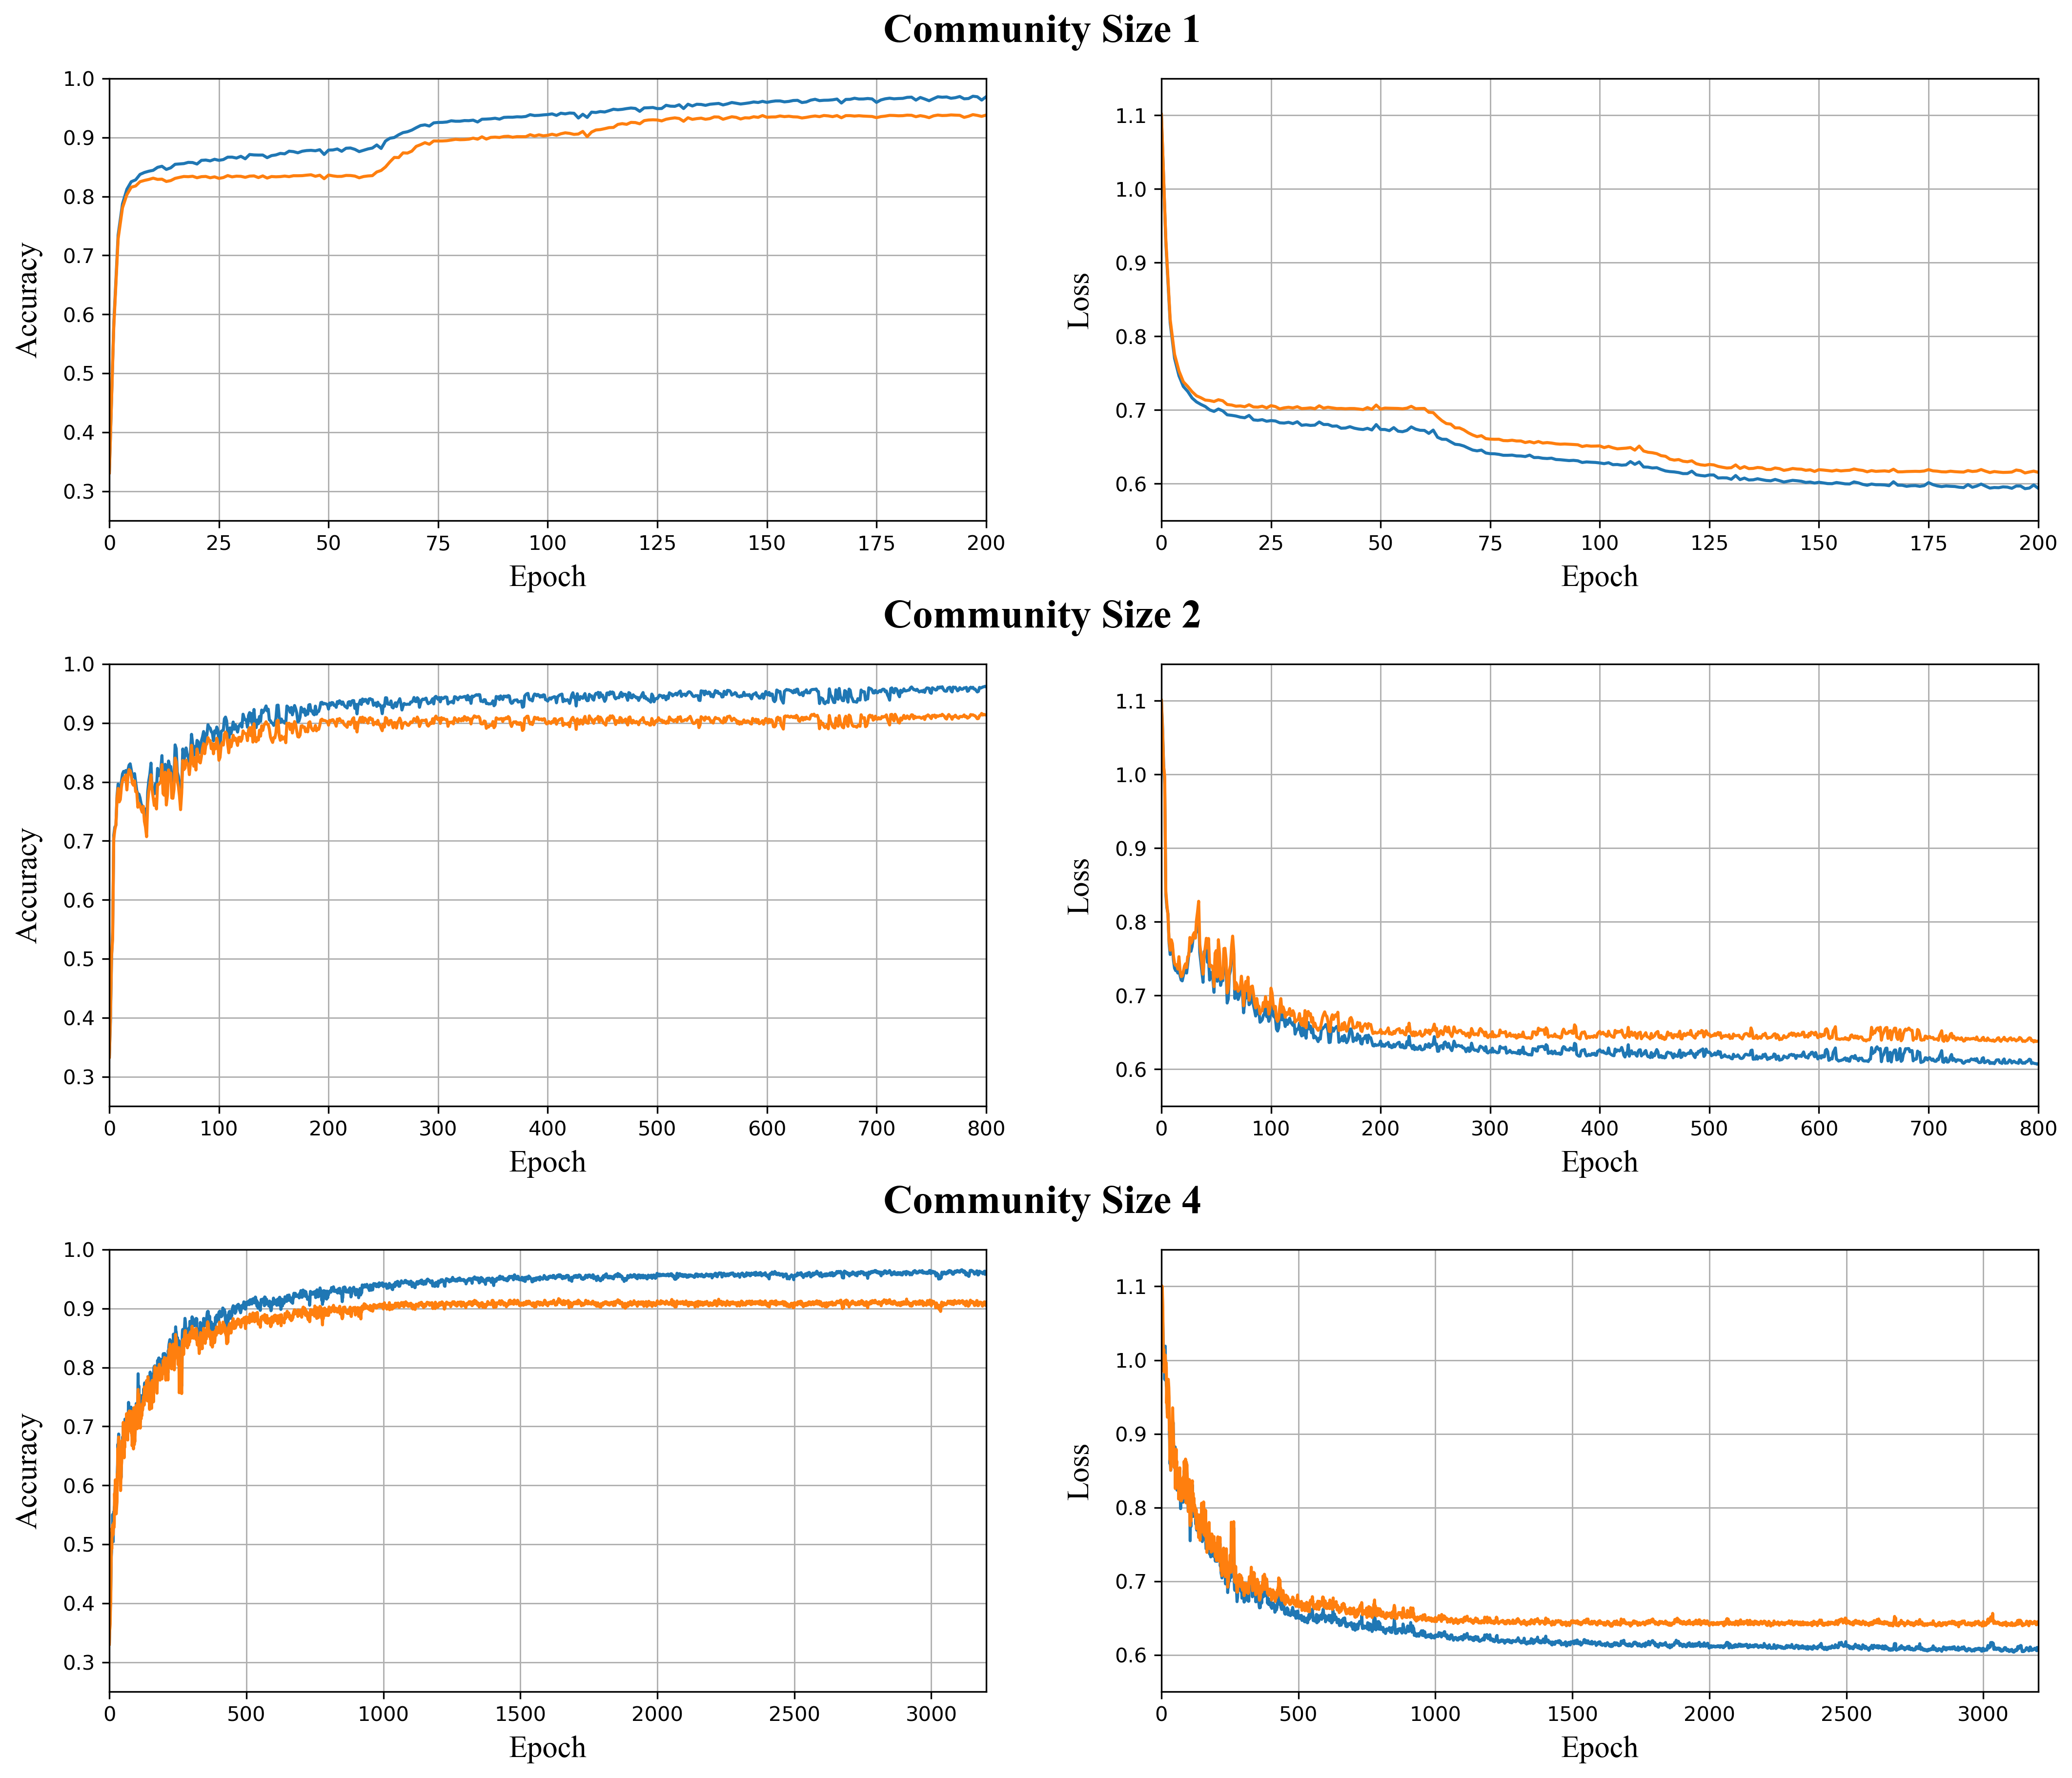

In [3]:
font_type = 'Times New Roman'
xlabel_size = 15
xlabel_pad = 5

ylabel_size = 15
ylabel_pad = 10

title_size = 25
title_pad = 20

row_title_size = 20
row_title_pad = 10

fig = plt.figure(figsize = (17,12), constrained_layout = True)

# create rows x 1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1, hspace = 2)

for row, subfig in enumerate(subfigs):
    subfig.suptitle(f'Community Size {comm_sizes[row]}', fontsize = row_title_size, fontfamily = font_type, fontweight = 'bold')

    # create 1 x cols subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=2, sharex = True)
    
    axs[0].plot(range(0,len(train_accs[row])),train_accs[row])
    axs[0].plot(range(0,len(val_accs[row])),val_accs[row])
    axs[0].set_ylim(0.25,1)
    axs[0].set_ylabel('Accuracy', fontsize = ylabel_size, labelpad = ylabel_pad, fontfamily = font_type)
    axs[0].set_xlim(0, len(val_accs[row])-1)
    axs[0].set_xlabel('Epoch', fontsize = xlabel_size, labelpad = xlabel_pad, fontfamily = font_type)
    axs[0].grid(True, linewidth = 0.7)
    
    axs[1].plot(range(0,len(train_losses[row])),train_losses[row])
    axs[1].plot(range(0,len(val_losses[row])),val_losses[row])
    axs[1].grid(True, linewidth = 0.7)
    axs[1].set_ylim(0.55, 1.15)
    axs[1].set_ylabel('Loss', fontsize = ylabel_size, labelpad = ylabel_pad, fontfamily = font_type)
    axs[1].set_xlabel('Epoch', fontsize = xlabel_size, labelpad = xlabel_pad, fontfamily = font_type)
    axs[1].set_xlim(0, len(val_losses[row])-1)
